In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make the plots look nicer
sns.set(style='whitegrid')



In [3]:
# Step 2: Load the dataset from the CSV file

file_path = r"data\covid-data.csv"

# Read the CSV file
df = pd.read_csv(file_path)

# Print the shape to see how many rows and columns we have
print("Dataset shape:", df.shape)

# Show the first 5 rows to get an idea of the data
df.head()



Dataset shape: (429435, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,05-01-2020,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,06-01-2020,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,07-01-2020,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,08-01-2020,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,09-01-2020,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [ ]:
# Step 3: Filter data for Germany only

germany_df = df[df['location'] == 'Germany'].copy()

# Select columns we need for analysis
cols_to_keep = [
    'date',
    'total_cases',
    'new_cases',
    'total_deaths',
    'new_deaths',
    'people_vaccinated',
    'people_fully_vaccinated'
]
germany_df = germany_df[cols_to_keep]

# Convert 'date' column to datetime format
germany_df['date'] = pd.to_datetime(germany_df['date'], dayfirst=True)

# Check for missing values in the selected columns
print(germany_df.isnull().sum())


date                         0
total_cases                  0
new_cases                  392
total_deaths                 0
new_deaths                 392
people_vaccinated          842
people_fully_vaccinated    861
dtype: int64


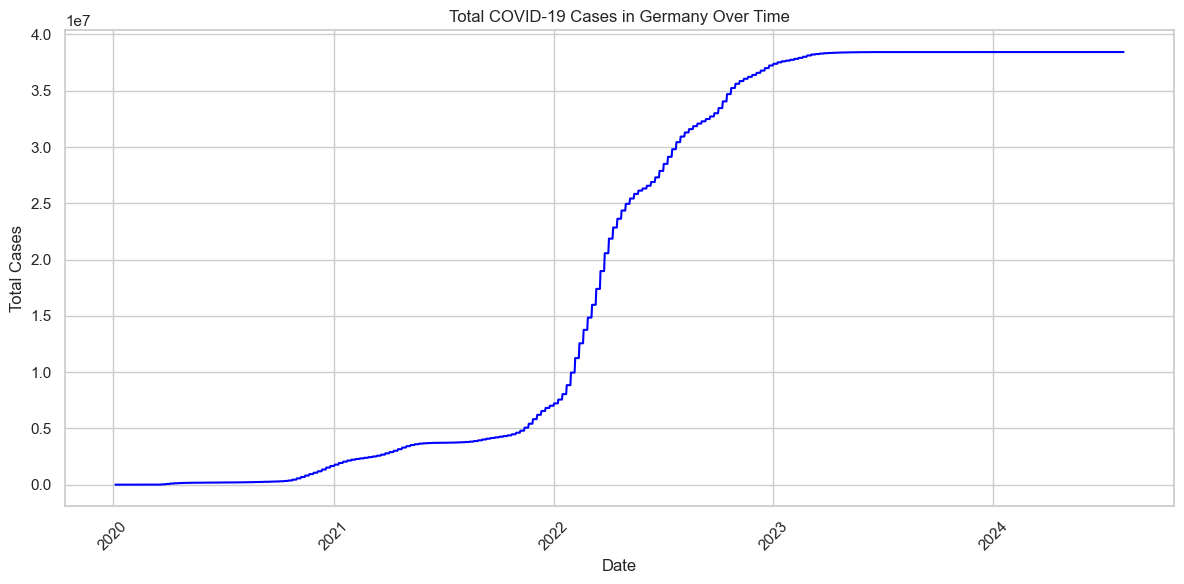

In [ ]:
# Step 4: Visualize total COVID-19 cases over time in Germany
plt.figure(figsize=(12,6))
plt.plot(germany_df['date'], germany_df['total_cases'], color='blue')
plt.title('Total COVID-19 Cases in Germany Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

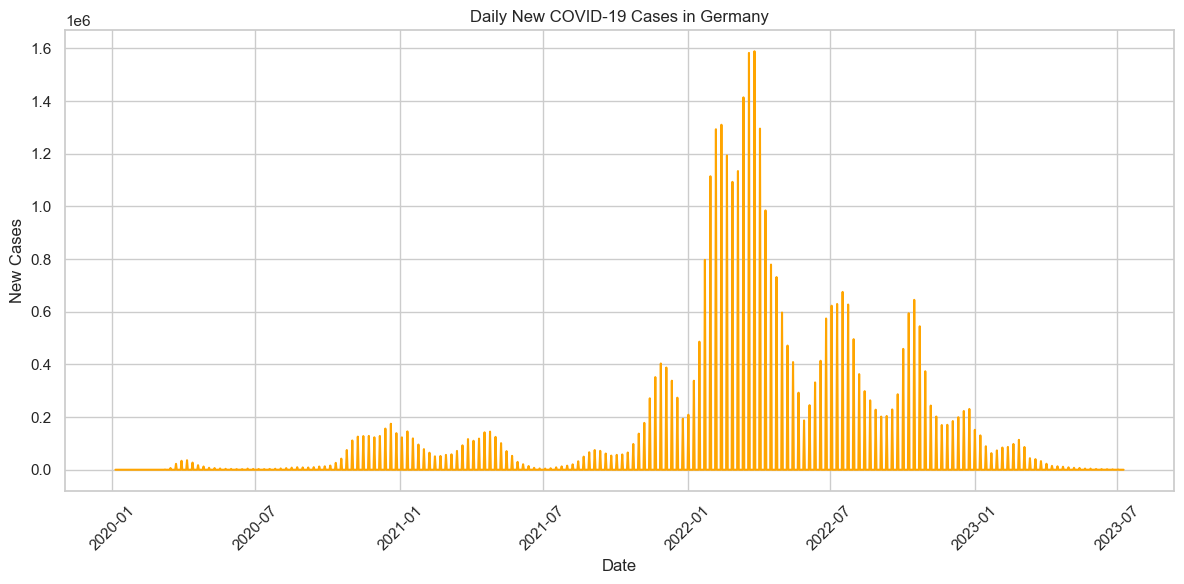

In [ ]:
# Step 5: Visualize daily new COVID-19 cases in Germany

plt.figure(figsize=(12,6))
plt.plot(germany_df['date'], germany_df['new_cases'], color='orange')
plt.title('Daily New COVID-19 Cases in Germany')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

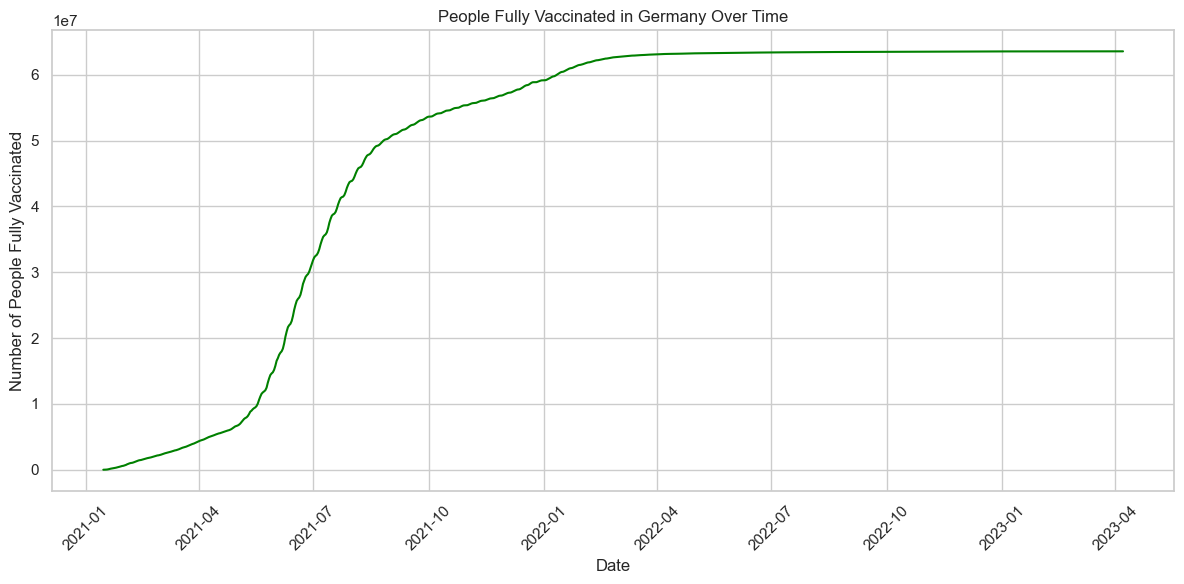

In [ ]:
# Step 6: Visualize vaccination progress over time in Germany

plt.figure(figsize=(12,6))
plt.plot(germany_df['date'], germany_df['people_fully_vaccinated'], color='green')
plt.title('People Fully Vaccinated in Germany Over Time')
plt.xlabel('Date')
plt.ylabel('Number of People Fully Vaccinated')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Handling missing data & adding key metrics

# Fill missing values in 'new_cases' and 'new_deaths' with 0 (assuming no new cases/deaths reported that day)
germany_df['new_cases'] = germany_df['new_cases'].fillna(0)
germany_df['new_deaths'] = germany_df['new_deaths'].fillna(0)

# For total cases and deaths, forward fill missing data assuming cumulative counts don’t go backward
germany_df['total_cases'] = germany_df['total_cases'].ffill()
germany_df['total_deaths'] = germany_df['total_deaths'].ffill()

# Calculate death rate over time (total deaths divided by total cases)
germany_df['death_rate'] = germany_df['total_deaths'] / germany_df['total_cases']

# Sometimes total_cases might be 0 (early days), avoid division errors by filling NaN with 0
germany_df['death_rate'] = germany_df['death_rate'].fillna(0)

# Calculate 7-day rolling averages for new cases and new deaths to smooth daily fluctuations
germany_df['new_cases_7day_avg'] = germany_df['new_cases'].rolling(window=7).mean()
germany_df['new_deaths_7day_avg'] = germany_df['new_deaths'].rolling(window=7).mean()

# Quick look at the new columns
germany_df[['date', 'new_cases', 'new_cases_7day_avg', 'new_deaths', 'new_deaths_7day_avg', 'death_rate']].tail(10)


,date,new_cases,new_cases_7day_avg,new_deaths,new_deaths_7day_avg,death_rate
142075,2024-07-26,0.0,0.0,0.0,0.0,0.004552
142076,2024-07-27,0.0,0.0,0.0,0.0,0.004552
142077,2024-07-28,0.0,0.0,0.0,0.0,0.004552
142078,2024-07-29,0.0,0.0,0.0,0.0,0.004552
142079,2024-07-30,0.0,0.0,0.0,0.0,0.004552
142080,2024-07-31,0.0,0.0,0.0,0.0,0.004552
142081,2024-08-01,0.0,0.0,0.0,0.0,0.004552
142082,2024-08-02,0.0,0.0,0.0,0.0,0.004552
142083,2024-08-03,0.0,0.0,0.0,0.0,0.004552
142084,2024-08-04,0.0,0.0,0.0,0.0,0.004552


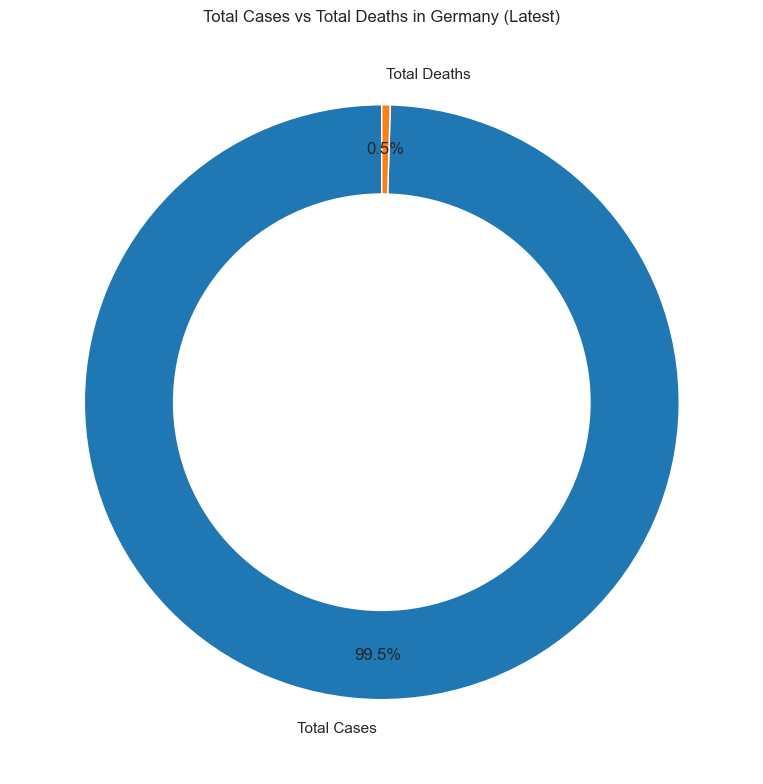

In [ ]:
# Donut chart showing proportion of total cases vs total deaths (latest data point)

latest_data = germany_df.iloc[-1]  # last row

sizes = [latest_data['total_cases'], latest_data['total_deaths']]
labels = ['Total Cases', 'Total Deaths']
colors = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%', pctdistance=0.85)

# Draw a white circle at the center to make it a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Total Cases vs Total Deaths in Germany (Latest)')
plt.tight_layout()
plt.show()



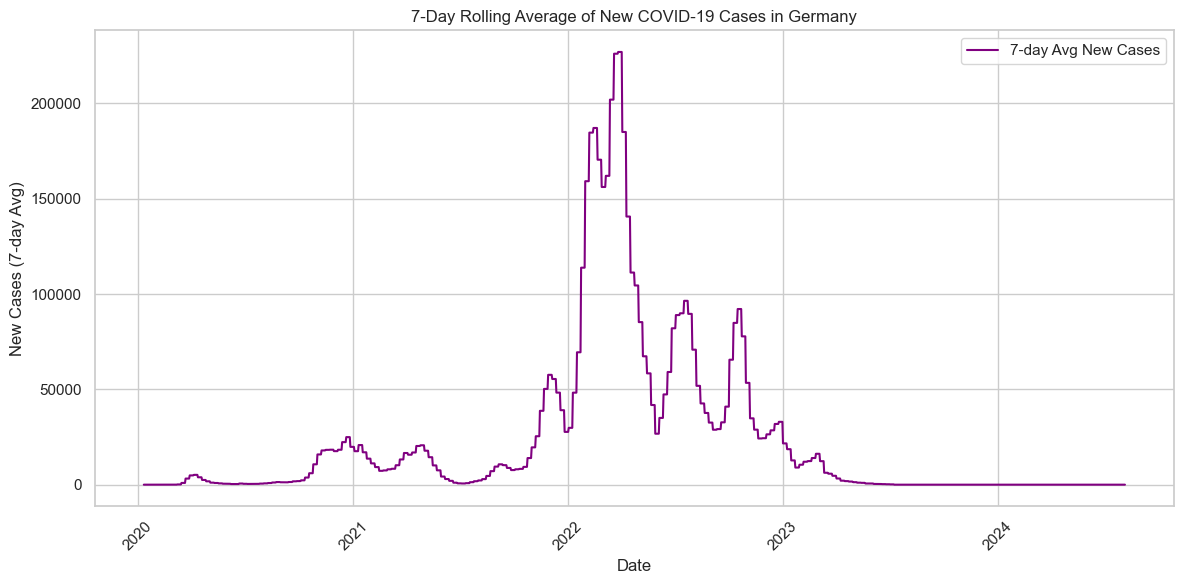

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(germany_df['date'], germany_df['new_cases_7day_avg'], color='purple', label='7-day Avg New Cases')
plt.title('7-Day Rolling Average of New COVID-19 Cases in Germany')
plt.xlabel('Date')
plt.ylabel('New Cases (7-day Avg)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

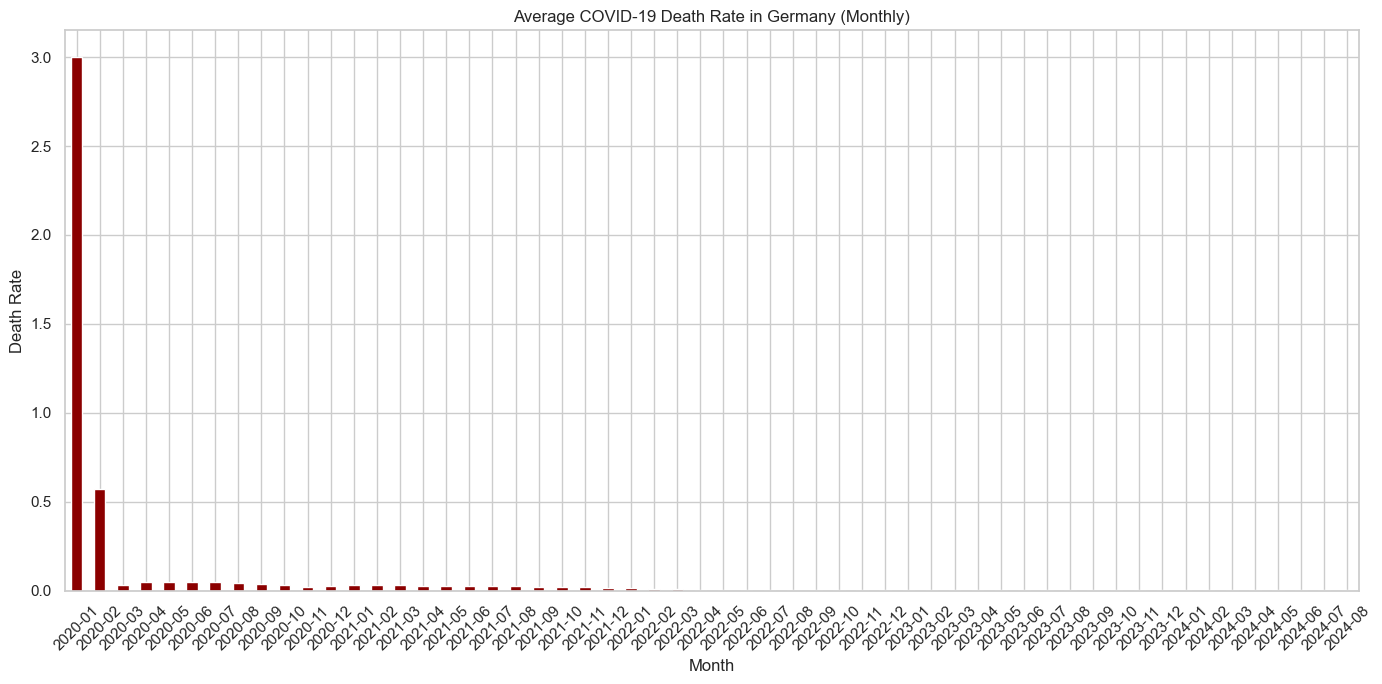

In [ ]:
# Group data by month to get average death rate per month
germany_df['month'] = germany_df['date'].dt.to_period('M')
monthly_death_rate = germany_df.groupby('month')['death_rate'].mean()

plt.figure(figsize=(14,7))
monthly_death_rate.plot(kind='bar', color='darkred')
plt.title('Average COVID-19 Death Rate in Germany (Monthly)')
plt.xlabel('Month')
plt.ylabel('Death Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Define Germany's population (constant)
population = 83200000

# Calculate vaccination coverage percentage
# Use total_vaccinations column; if missing values, fill with 0 to avoid errors
germany_df['total_vaccinations'] = germany_df['people_vaccinated'].fillna(0)

germany_df['vaccination_coverage_pct'] = (germany_df['people_vaccinated'] / population) * 100

# Quick check of the new column
germany_df[['date', 'people_vaccinated', 'vaccination_coverage_pct']].tail(10)


,date,people_vaccinated,vaccination_coverage_pct
142075,2024-07-26,NaN,NaN
142076,2024-07-27,NaN,NaN
142077,2024-07-28,NaN,NaN
142078,2024-07-29,NaN,NaN
142079,2024-07-30,NaN,NaN
142080,2024-07-31,NaN,NaN
142081,2024-08-01,NaN,NaN
142082,2024-08-02,NaN,NaN
142083,2024-08-03,NaN,NaN
142084,2024-08-04,NaN,NaN


In [ ]:
# Fill NaN in people_vaccinated with 0 for calculation
germany_df['people_vaccinated'] = germany_df['people_vaccinated'].fillna(0)

# Define Germany's population
population = 83200000

# Calculate vaccination coverage percentage
germany_df['vaccination_coverage_pct'] = (germany_df['people_vaccinated'] / population) * 100

# Check the last 10 rows to confirm
print(germany_df[['date', 'people_vaccinated', 'vaccination_coverage_pct']].tail(10))


             date  people_vaccinated  vaccination_coverage_pct
142075 2024-07-26                0.0                       0.0
142076 2024-07-27                0.0                       0.0
142077 2024-07-28                0.0                       0.0
142078 2024-07-29                0.0                       0.0
142079 2024-07-30                0.0                       0.0
142080 2024-07-31                0.0                       0.0
142081 2024-08-01                0.0                       0.0
142082 2024-08-02                0.0                       0.0
142083 2024-08-03                0.0                       0.0
142084 2024-08-04                0.0                       0.0


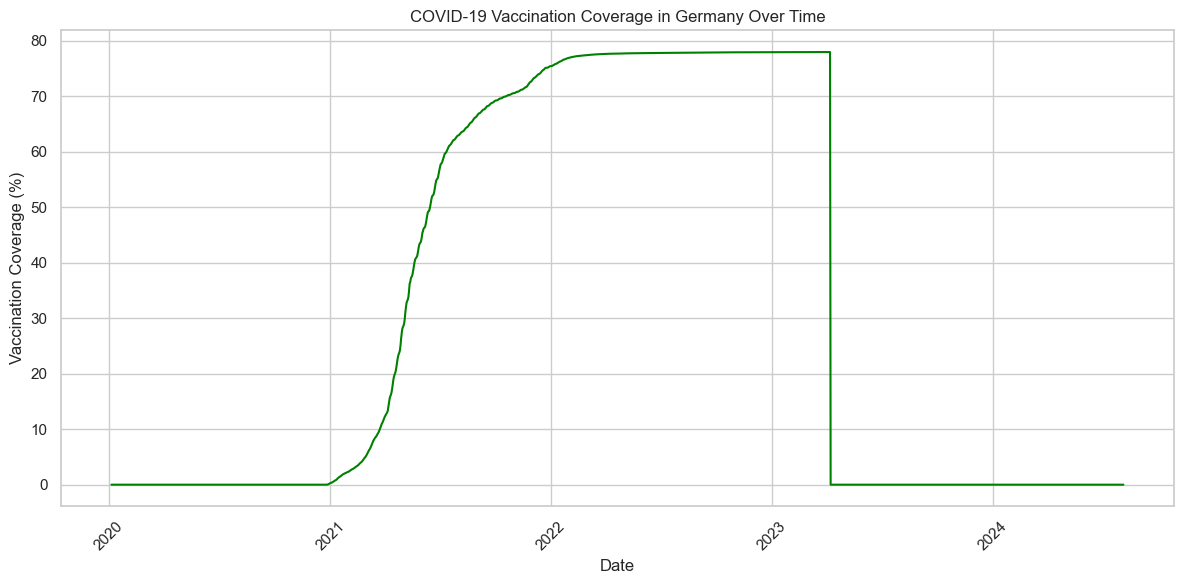

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(germany_df['date'], germany_df['vaccination_coverage_pct'], color='green')
plt.title('COVID-19 Vaccination Coverage in Germany Over Time')
plt.xlabel('Date')
plt.ylabel('Vaccination Coverage (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
